# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
# For this assignment, we need to load in the following modules
import requests
import StringIO
import zipfile
import scipy.stats 
from bs4 import BeautifulSoup


In [10]:
#r = rq.get("http://www.seanlahman.com/baseball-archive/statistics/", stream=True)
#z = gzf.GzipFile(fileobj=sIO.StringIO(r.content))
#tar= tf.open(fileobj=sIO.StringIO(r.content))
#tar.extractall()
#type(tar)

In [11]:
r.headers

NameError: name 'r' is not defined

In [12]:
#your code here
sal = pd.read_csv("Salaries.csv", delimiter=',', encoding="utf-8-sig")
tem = pd.read_csv("Teams.csv", delimiter=',', encoding="utf-8-sig")
print sal.head()
print "===================================="
print tem.head()

   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667
   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Boston Red Stockings       So

In [13]:
print sal.dtypes
print "============="
print tem.dtypes

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object
yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                  int64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA    

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [14]:
#your code here
totSal=sal[["teamID","yearID", "salary"]].sort_values(by=["teamID","yearID"]).groupby(["teamID","yearID"]).sum()
totSal.head(30)

salary
teamID yearID           
ANA    1997     31135472
       1998     41281000
       1999     55388166
       2000     51464167
       2001     47535167
       2002     61721667
       2003     79031667
       2004    100534667
ARI    1998     32347000
       1999     68703999
       2000     81027833
       2001     85082999
       2002    102819999
       2003     80657000
       2004     69780750
       2005     62329166
       2006     59684226
       2007     52067546
       2008     66202712
       2009     73115666
       2010     60718166
       2011     53639833
       2012     73804833
       2013     90132000
ATL    1985     14807000
       1986     17102786
       1987     16544560
       1988     12728174
       1989     11112334
       1990     14555501

In [15]:
totSal.describe()

,salary
count,8.280000e+02
mean,5.394026e+07
std,3.868466e+07
min,8.800000e+05
25%,2.336596e+07
50%,4.545050e+07
75%,7.680033e+07
max,2.319789e+08


In [16]:
totSal.shape, tem.shape

((828, 1), (2745, 48))

In [17]:
tem.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [18]:
temSub= tem[tem.yearID >1984]
totTeamSub=temSub[["teamID","yearID", "W"]].sort_values(by=["teamID","yearID"]).groupby(["teamID","yearID"]).sum()
print temSub.shape[0], totTeamSub.shape
totTeamSub.head(30)

828 (828, 1)


W
teamID yearID     
ANA    1997     84
       1998     85
       1999     70
       2000     82
       2001     75
       2002     99
       2003     77
       2004     92
ARI    1998     65
       1999    100
       2000     85
       2001     92
       2002     98
       2003     84
       2004     51
       2005     77
       2006     76
       2007     90
       2008     82
       2009     70
       2010     65
       2011     94
       2012     81
       2013     81
ATL    1985     66
       1986     72
       1987     69
       1988     54
       1989     63
       1990     65

In [19]:
print sal.yearID.min(), sal.yearID.max()
print tem.yearID.min(), tem.yearID.max()

1985 2013
1871 2013


In [20]:
print totSal.index
print totTeamSub.index

MultiIndex(levels=[[u'ANA', u'ARI', u'ATL', u'BAL', u'BOS', u'CAL', u'CHA', u'CHN', u'CIN', u'CLE', u'COL', u'DET', u'FLO', u'HOU', u'KCA', u'LAA', u'LAN', u'MIA', u'MIL', u'MIN', u'ML4', u'MON', u'NYA', u'NYN', u'OAK', u'PHI', u'PIT', u'SDN', u'SEA', u'SFN', u'SLN', u'TBA', u'TEX', u'TOR', u'WAS'], [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7

In [21]:
print totSal.describe()
print totTeamSub.describe() 

             salary
count  8.280000e+02
mean   5.394026e+07
std    3.868466e+07
min    8.800000e+05
25%    2.336596e+07
50%    4.545050e+07
75%    7.680033e+07
max    2.319789e+08
                W
count  828.000000
mean    79.833333
std     12.011230
min     43.000000
25%     71.000000
50%     80.000000
75%     89.000000
max    116.000000


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [22]:
#your code here
result = pd.concat([totSal, totTeamSub], axis=1, join='inner')
print "shape of the new dataframe= ", result.shape
print result.describe()
print "index shape: ", result.index.shape
print result.head()
print result.index.get_level_values(0)
print result.index.get_level_values(1)
print result.ix[result.shape[0]-2]
#result.ix[0:result.shape[0]-1].ix[1998]
result.ix[('ANA', 1998)]
sTeamID =set(sal['teamID'].tolist())
sYear= set(sal['yearID'].tolist())
len(sTeamID), len(sYear)
print sTeamID

    




shape of the new dataframe=  (828, 2)
             salary           W
count  8.280000e+02  828.000000
mean   5.394026e+07   79.833333
std    3.868466e+07   12.011230
min    8.800000e+05   43.000000
25%    2.336596e+07   71.000000
50%    4.545050e+07   80.000000
75%    7.680033e+07   89.000000
max    2.319789e+08  116.000000
index shape:  (828,)
                 salary   W
teamID yearID              
ANA    1997    31135472  84
       1998    41281000  85
       1999    55388166  70
       2000    51464167  82
       2001    47535167  75
Index([u'ANA', u'ANA', u'ANA', u'ANA', u'ANA', u'ANA', u'ANA', u'ANA', u'ARI',
       u'ARI',
       ...
       u'TOR', u'WAS', u'WAS', u'WAS', u'WAS', u'WAS', u'WAS', u'WAS', u'WAS',
       u'WAS'],
      dtype='object', name=u'teamID', length=828)
Int64Index([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 1998, 1999,
            ...
            2013, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
           dtype='int64', name=u'yearID', leng

#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

/Applications/anaconda/envs/py27/lib/python2.7/site-packages/pandas/indexes/base.py:1945: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(key)
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/pandas/indexes/base.py:1947: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(self._maybe_cast_indexer(key))
/Applications/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


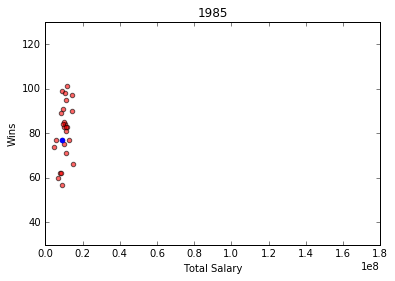

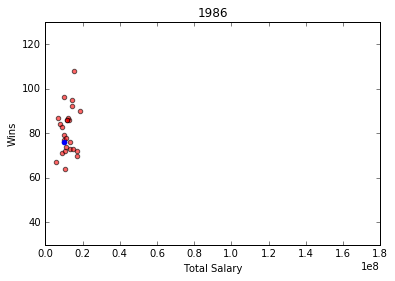

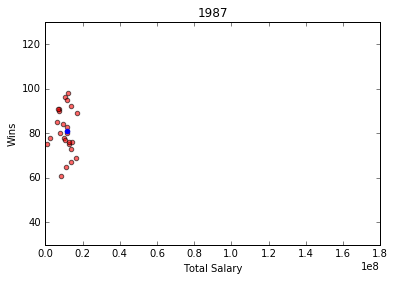

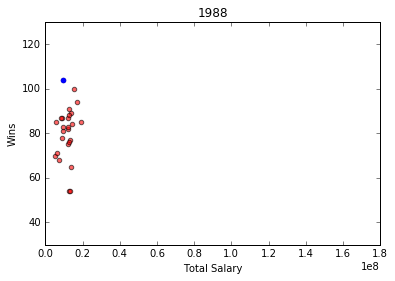

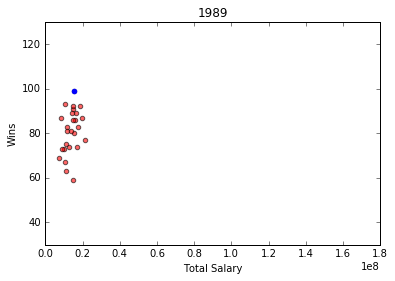

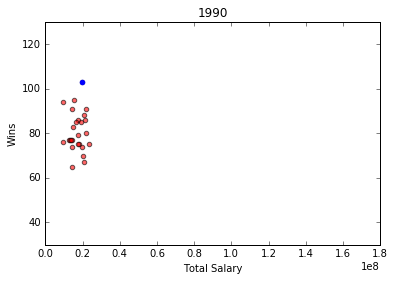

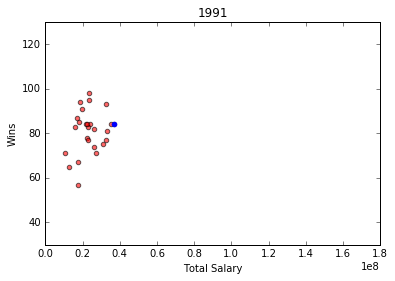

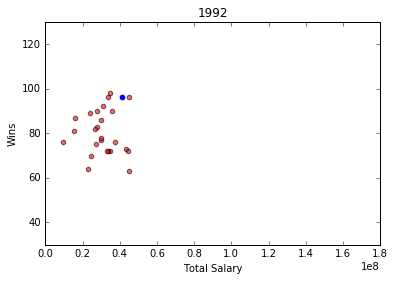

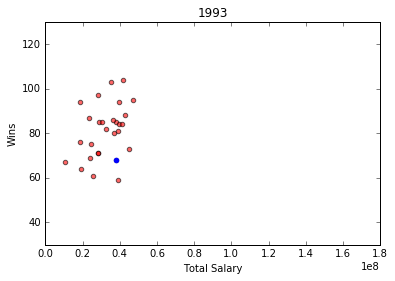

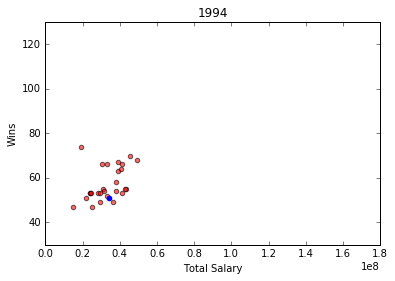

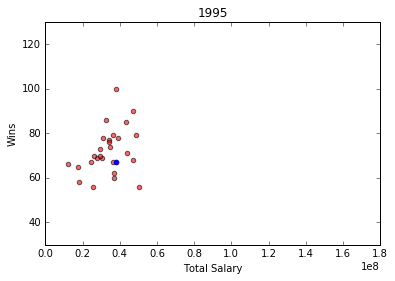

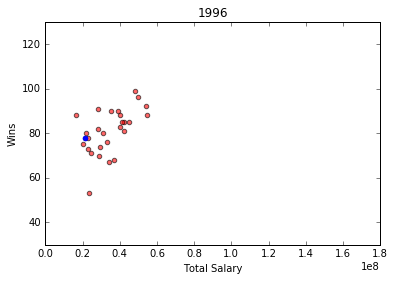

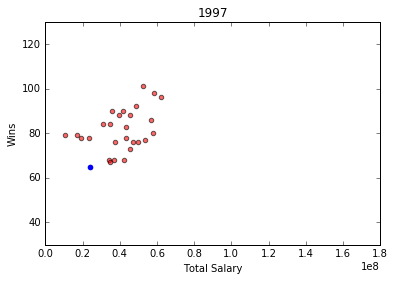

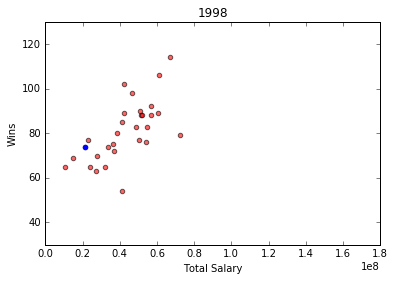

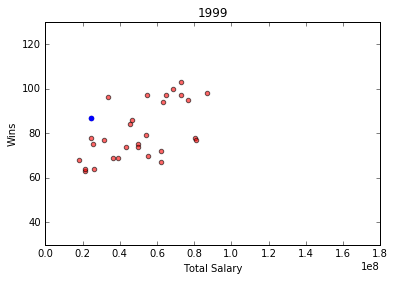

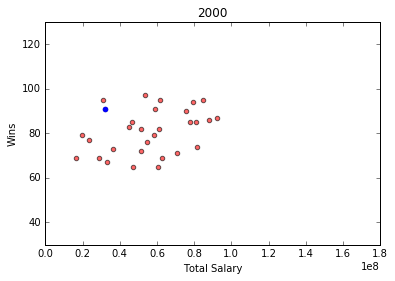

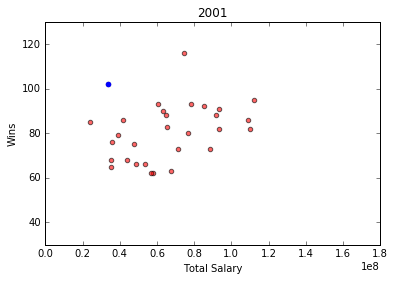

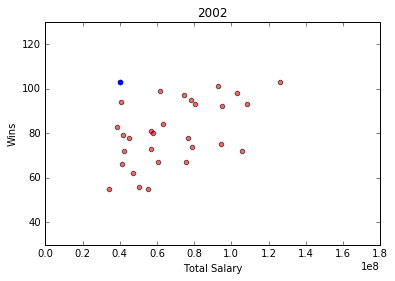

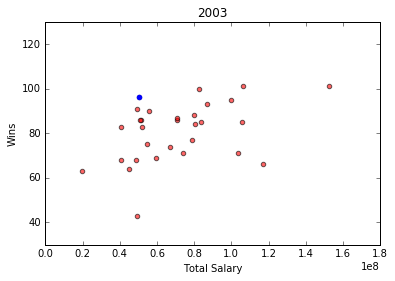

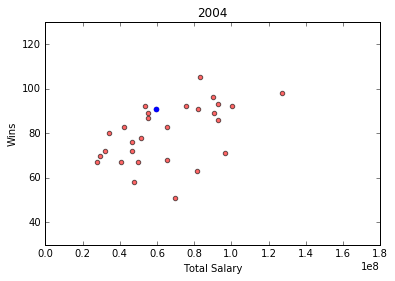

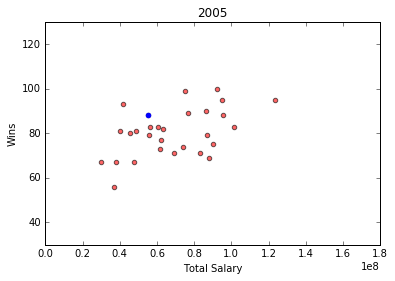

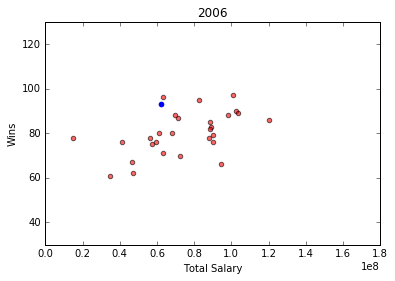

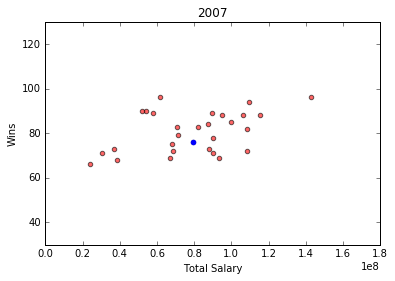

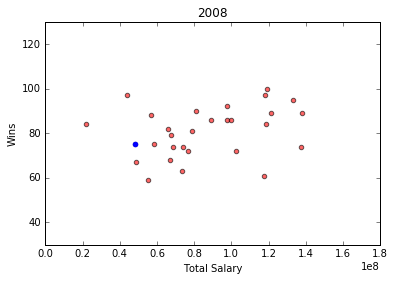

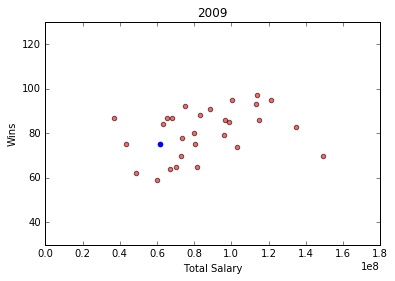

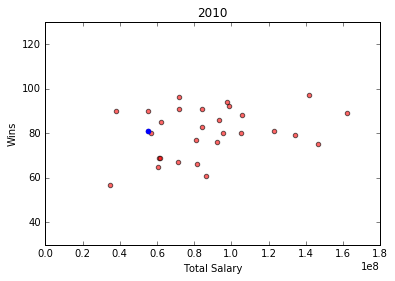

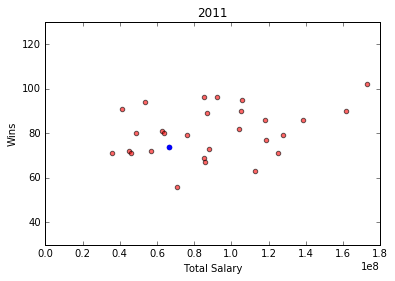

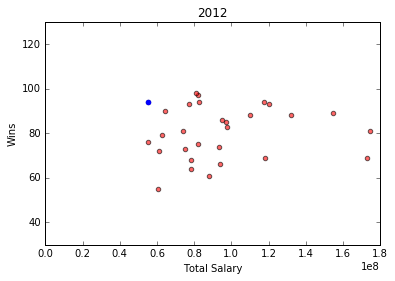

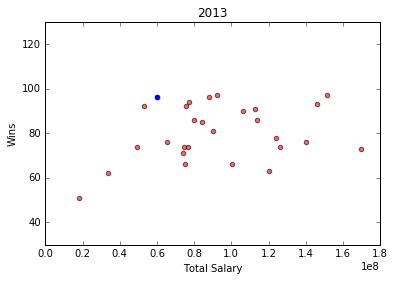

In [23]:
#your code here
yearResult= pd.DataFrame()
erro=[]
for year in sYear:
    for i in sTeamID:
        try:
            yearResult= yearResult.append(result.ix[(i, year)])
        except IndexError:
            continue
    slope, intercept, r_value, p_value, std_err = stats.linregress(yearResult.W,yearResult.salary)
    erro.append(std_err)
    yearResult.plot(x='salary', y='W', kind = 'scatter', color = 'red', alpha = 0.6)
    plt.scatter(result.ix[('OAK', year)].salary, result.ix[('OAK', year)].W, color='blue')
    #plt.plot(yearResult.W, slop*yearResult.W+intercept, '--k')
    plt.title(year)
    plt.xlabel('Total Salary')
    plt.ylabel('Wins')   
    plt.xlim(0, 180000000)
    plt.ylim(30, 130)
    yearResult= pd.DataFrame()
    

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013] 29
-------------------
[37694.614282634873, 61943.291970639337, 79666.882411377141, 56701.374849689957, 68568.266624737094, 84879.59562465841, 140912.91529981731, 182709.85930787487, 139411.96958893712, 201893.96939796521, 170636.53723564095, 175203.63296892983, 239428.36772659695, 161784.10233945737, 256387.86392597546, 382438.20724351011, 340044.304318649, 283655.32544330333, 359668.83337488776, 385109.07104781031, 519288.98832598032, 510364.47632403439, 600608.17747707048, 609005.58978096955, 491995.72722942382, 608386.58517708757, 616491.36341945757, 572414.78322690038, 718451.90982610441] 29


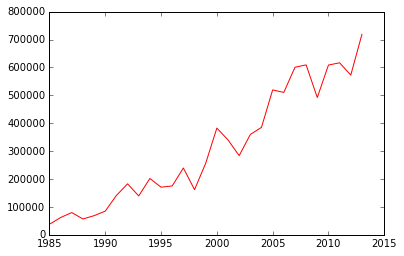

In [24]:
#your code here
print list(sYear), len(sYear)
print '-------------------'
print erro, len(erro)
plt.plot(list(sYear), erro, 'r-')

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [4]:
#your code here
url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
s = StringIO.StringIO(requests.get(url).content)
countries = pd.read_csv(s)
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [5]:
#your code here
url2= "http://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&output=xls"
r = requests.get(url2) #this is the url response object
#soup = BeautifulSoup(r.content)
#table= soup.find("div", {"id":"sheets-viewport"})
#table= soup.find("tbody")
#print(table)
data_stream= StringIO.StringIO(r.content)
income= pd.read_excel(data_stream)
income.head()


,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [17]:
#your code here
income_trans= income.T
income_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,NaN,NaN
1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,...,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,...,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,...,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,...,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

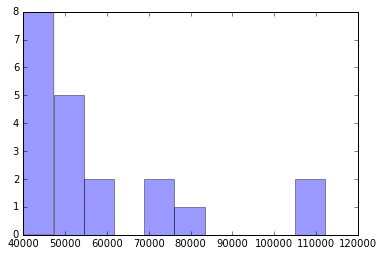

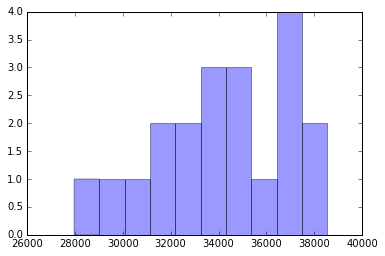

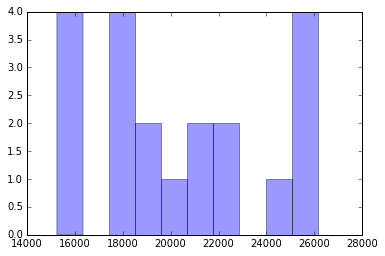

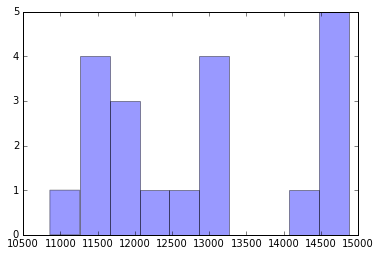

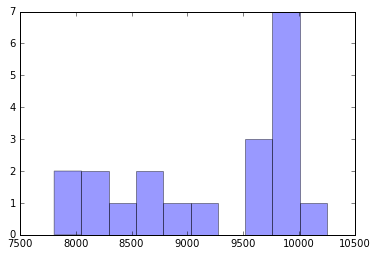

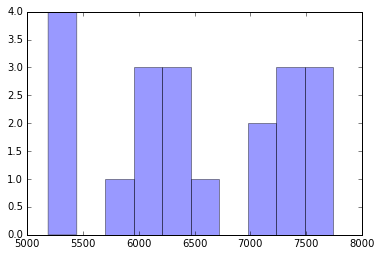

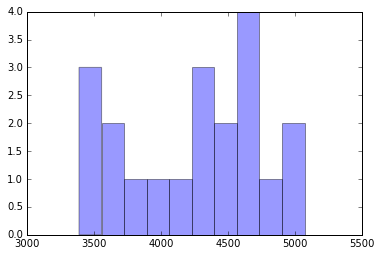

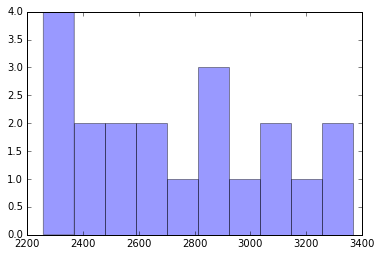

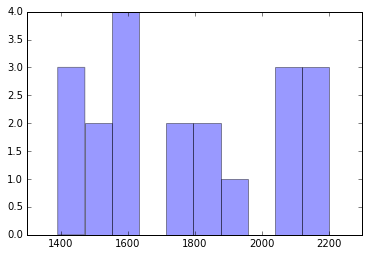

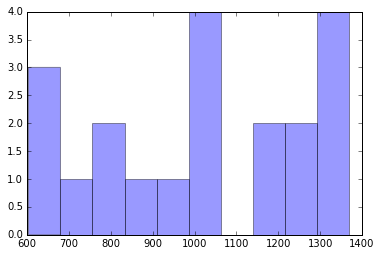

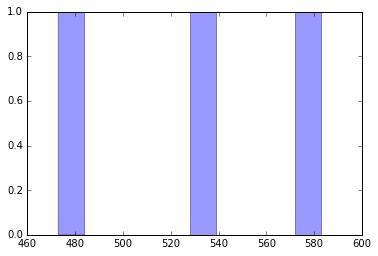

In [81]:
#Replace NAN with -1
income_trans_1=income_trans.fillna(-1)
income_trans_1.columns= income_trans_1.loc['GDP per capita']
#income_trans_1.loc['GDP per capita'].values
income_trans_1= income_trans_1[income_trans_1.index!='GDP per capita']
income_trans_1.head()

sort=income_trans_1.loc[2000]
sort.sort_values(inplace=True, ascending=False)

#sort= sort.sort_values(inplace=True)
sort1= sort[sort.values !=-1]
sort2= sort[sort.values ==-1]
#print(sort1, sort1.size)
#print(sort2, sort2.size)
#sort1[:20].plot(kind='barh')
#sort1[20:40].plot(kind='barh')

ct=0
con=True
while con==True:
    if sort1.size-ct>20:
       plt.hist(sort1[ct:ct+20].values, alpha=0.4)
       #plt.yticks(21,sort1.index.values[ct:ct+20])
       #plt.xlabel('GDP per capita')
       #plt.title('GDP per capita arround the world?')
       plt.show()
       ct+=20
    else:
       plt.hist(sort1[ct:].values, alpha=0.4)
       #plt.yticks(21,sort1.index.values[ct:ct+20])
       #plt.xlabel('GDP per capita')
       #plt.title('GDP per capita arround the world?')
       plt.show()
       con=False

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [26]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here

"\nFunction\n--------\nmergeByYear\n\nReturn a merged DataFrame containing the income, \ncountry name and region for a given year. \n\nParameters\n----------\nyear : int\n    The year of interest\n\nReturns\n-------\na DataFrame\n   A pandas DataFrame with three columns titled \n   'Country', 'Region', and 'Income'. \n\nExample\n-------\n>>> mergeByYear(2010)\n"

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [27]:
#your code here

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [28]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

'\nFunction\n--------\nratioNormals\n\nReturn ratio of these two proportions: \n    Pr(X > a)/Pr(Y > a) as function of \n    the difference in the average of X \n    and the average of Y. \n\nParameters\n----------\ndiff : difference in the average of X \n    and the average of Y. \na : cutoff value\n\nReturns\n-------\nReturns ratio of these two proportions: \n    Pr(X > a)/Pr(Y > a)\n    \nExample\n-------\n>>> ratioNormals(diff = 1, a = 2)\n'

In [29]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [30]:
#your code here

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [31]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [32]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
